# <span style="color:blue">Hash Tables
AWS CLOUD INSTITUTE: PROVIDED FOR EDUCATIONAL INSTRUCTIONAL PURPOSES ONLY.

## Import Libraries
I'm **going to use Python's basic logging library** to optionally print some additional statements for some examples. I'll set the intial logging level to only log warnings.

In [ ]:
import logging

# set initial level to warnings or higher
logging.basicConfig(level=logging.WARNING)

# Get a logger
logger = logging.getLogger("my_logger")

# Overview
A hash table is a **data structure** that **efficienty maps keys to values**.
- The **key can be** any **immutable data type**
    - An immutable object is one that doesn’t change after it’s created. **Strings and integers are common**, but any custom class can be made immutable.
- To support fast access, **hash tables** generally **rely on a fixed length array to main data**
    - **Keys** are **mapped to** the **array index using** a **hash function**
 
**In Python**, the **built-in Dictionary data structure is** an **implemenation of** a **Hash Table**, so there is usually not need to to implement your own. The **concepts behind it are important** though, so we'll break them down here. We'll also provide a simple implementation as well.

The example below shows a hash table that maps a person's name, to an account number. Note that **each name** was **mapped to an array index**, using the hashing mechanism we'll see later.\
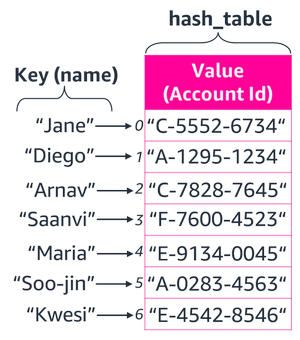

# Hash Values and Hash Functions 
One of the most **critical steps in implementing a hash table**, is being able to **take a key of various data types**, and **convert it predictably into an index** within the **correct range for** by **hash table** size.

The process generally has **two steps**:
1. **Generate** a relatively **large integer value for** the provided **key**
    - The **value should be predictable**, such that generating a hash value twice for the same key, should yield the same result. 
3. **Map** that **value to** an **index within** the **table size** range, **using** the **modulo operator (%)**

## Step 1: Generating hash value
One of the **simplest ways** to **generate** an **intial hash value** is to **use Python's built** in **[hash function](https://docs.python.org/3/library/functions.html#hash)**. It **returns a large integer value**, which is **predictable within the same session**.

### Examples with the Python hash() function

#### Hashing string keys
We're going to **start with string values**, since they'll be the most common keys we need to hash.

In [ ]:
# some simple names
name1 = "Jane"
name2 = "Diego"
name3 = "Arnav"

# same random ids
id1 = "ABD-124-VLD"
id2 = "847927402"
id3 = "7723-7562-5826-2846"

# some longer strings
str1 = "You want the truth"
str2 = "You can't handle the truth"

In [ ]:
# generate and print hash values for all the strings above
print(f'hash("{name1}") = {hash(name1)}')
print(f'hash("{name2}") = {hash(name2)}')
print(f'hash("{name3}") = {hash(name3)}')
print(f'hash("{id1}") = {hash(id1)}')
print(f'hash("{id2}") = {hash(id2)}')
print(f'hash("{id3}") = {hash(id3)}')
print(f'hash("{str1}") = {hash(str1)}')
print(f'hash("{str2}") = {hash(str2)}')

**Any observations?**

For one, there **doesn't seem to be any pattern** regarding the **hash values**for **strings** which are **long**, **short**, or of **different format**. They are just large random numbers.

Note also that **some of the values are negative**. That't **not a problem**, since we'll ultimately use the result of step 2, when we reduce the number to a smaller index.

**What about predictability?**

Remember that a **key requiremen**t is that the **hash values will be consistent for the same key**. So let's **repeat the generation and confirm** that.

**Please note** that in the example below I'm not just calling hash on the same variables. **I'm creating new variables**, with the **same strings**. So this will **confirm** that the **string value itself**, will be **consistently mapped** to the **same hash value**.

In [ ]:
# create new variables for the same strings
new_name1 = "Jane"
new_name2 = "Diego"
new_name3 = "Arnav"
new_id1 = "ABD-124-VLD"
new_id2 = "847927402"
new_id3 = "7723-7562-5826-2846"
new_str1 = "You want the truth"
new_str2 = "You can't handle the truth"

# generate and print hash values for all the strings above
print(f'hash("{new_name1}") = {hash(new_name1)}')
print(f'hash("{new_name2}") = {hash(new_name2)}')
print(f'hash("{new_name3}") = {hash(new_name3)}')
print(f'hash("{new_id1}") = {hash(new_id1)}')
print(f'hash("{new_id2}") = {hash(new_id2)}')
print(f'hash("{new_id3}") = {hash(new_id3)}')
print(f'hash("{new_str1}") = {hash(new_str1)}')
print(f'hash("{new_str2}") = {hash(new_str2)}')

**Ok, all good.** If we scroll up and compare, we see that the **generated values are the same.** I won't repeate this check for he other examples, but are welcome to.

#### Hashing other data types
Although strings might be the most commonly use key data type, **any immutable data type can be hashed**.  

An **immutable data type** is one that **cannot be changed after it is created**. It may appear that you can change a string or an integer value, but in reality Python creates a new object with the modified value. 

##### Integers

In [ ]:
# an integer value
int_val = 112166

# generate and print hash value
print(f'hash(int_val) = {hash(int_val)}')

So **integers** will just **hash to themselves**. Not all that useful.

##### Floats

In [ ]:
# an float value
float_val = 3.1416

# generate and print hash value
print(f'hash(float_val) = {hash(float_val)}')

Floats will hash to a completely different integer value. Though floats are not usually used as keys.

##### Tuples

In [ ]:
# a tuple variable
tuple_val = ("Mary Major", 34)

# generate and print hash value
print(f'hash(tuple_val) = {hash(tuple_val)}')

**Tuples** are **immutable**, so yes, you **can hash them.** That could be useful for a composite key.

##### Lists

In [ ]:
# a list variable
list_val = ["Mary Major", 34] 

# generate and print hash value
print(f'hash(list_val) = {hash(list_val)}')

**Lists are mutable** (I can update a list variable in place after it's created), so **no can do**.

#### Hashing custom classes - simple approach
**Python will automatically generate a hash value for a class object**. However, **if you plan to use your own class** as the **key in** a **hash table**, it is highly recommended you **implement your own hash value** for the class. We will look at that later.

For now, let's just show the simple case.

##### Create a sample class

In [ ]:
class User:
    def __init__(self, fname, lname, email, age):
        self.fname = fname
        self.lname = lname
        self.email = email
        self.age = age

##### Create objects and hash

In [ ]:
# create 3 users
user1 = User("John", "Stiles", "john@example.com", 32)
user2 = User("Akua", "Mansa", "akue@example.com", 53)
user3 = User("Carlos", "Salazar", "carlos@example.com", 34)

# print hash value for each user
print(f'hash(user1) = {hash(user1)}')
print(f'hash(user2) = {hash(user2)}')
print(f'hash(user3) = {hash(user3)}')

That looks fine, so **why** did we say we **should generate** our **own hash value?**

The **problem is** that **using** this **default approach**, you **don't control what Python uses to generate** the **hash value**. Remember that a **hash function needs to be predicatable**, and generate the **same value for the same object**. The question becomes, **what does it mean to be "the same value" for your class**. As we'll see below, the **dafault hash value** for a class object **won't be the same even** if **all the attributes** are the **same.**

In [ ]:
# create 2 users with the same exact attributes
user4 = User("Mary", "Major", "mary@example.com", 32)
user5 = User("Mary", "Major", "mary@example.com", 32)

# print hash value for each user
print(f'hash(user4) = {hash(user4)}')
print(f'hash(user5) = {hash(user5)}')

**Even if Python used** strictly the **class attributes**, there is s**till a question** of **what is your definition of equality**. In this example for instance, perhaps only first and last name should be used, because email and age change over time.

We'll **see later how** we **can control this** and **define our own hash value for** our **classes**.

### Regarding the predictability of the hash function
Please note that the **hash function uses** a **different random generation seed for each session**. **Within** the **same execution**, the **same object** will **predictably produce** the **same hash value**. **However,different execution sessions** will get **different hash values**. That means you should not use Python's *hash()* if you rely on a hash value being consistent across different executions. For that, you can either create your own function, or utilize the **more rubust [hashlib module](https://docs.python.org/3/library/hashlib.html) module**

## Step 2: Map hash value to a valid hash table index
The **typical hash table** internal **data storage** will be an **array structure of fixed value**. Our **hash function** will **need to consistently and evenly map** the **large integer hash values**, **to** an **integer index in the range of** my **hash table**.
- **Consistently**, meaning that the **same value always maps to the same index**
- **Evenly** meaning that a **random set of integer values**, will **map to** an **even distribution of indexes**

The **easiest and widely adopted way** of doing this is to **use** the **modulo operator (%)**, which returns the **remainder of an integer division**. Example:
> **5 % 2 = 1**

If we **use** the **table size as the denominator** in our division, we are **guaranteed a remainder between 0 and the (table size - 1)**. Which is **exactly the index range we need**. So the formula will be:
> ***\<index\> = \<hash value\> % \<table size\>***

### Modulo (remainder) refresher
Let's just quickly visualize the values we get using the module operator for different values.

In [ ]:
# Modulo (remainder) for denominator of 3, for 10 values
denominator = 3
print(f"Modulo/remainder for denominator {denominator}")
for i in range(10):
    modulo = i % denominator
    print(f"{i} % {denominator} = {modulo}")

In [ ]:
# Modulo (remainder) for denominator of 5, for 10 values
denominator = 5
print(f"Modulo/remainder for denominator {denominator}")
for i in range(10):
    modulo = i % denominator
    print(f"{i} % {denominator} = {modulo}")

In [ ]:
# Modulo (remainder) for denominator of 7, for 10 values
denominator = 7
print(f"Modulo/remainder for denominator {denominator}")
for i in range(10):
    modulo = i % denominator
    print(f"{i} % {denominator} = {modulo}")

So we can see that the **modulo value** is always **between 0 and (*denominator* - 1)**.

### Testing it out for a few values
Let's **test it out with a few string variables**. We'll use some first and last names, since these are good examples that might be used as keys.

In [ ]:
# create 15 strings with names
name1 = "Alejandro Rosalez"
name2 = "Akua Mansa"
name3 = "Ana Carolina Silva"
name4 = "Arnav Desai"
name5 = "Carlos Salazar"
name6 = "Diego Ramirez"
name7 = "Efua Owusu"
name8 = "Gil-dong Hong"
name9 = "Jane Doe"
name10 = "Ji-hoon Namgoong"
name11 = "John Doe"
name12 = "John Stiles"
name13 = "Jorge Souza"
name14 = "Kwaku Mensah"
name15 = "Kwesi Manu"

Now let's **define** our target **hash table size**, and **see** what the **indexes we would generate**.

In [ ]:
# define the hash table size
hash_table_size = 100

In [ ]:
# generate hash value and use the modulo of the hash_table_size to derive an index
hash_value = hash(name1)
index = hash_value % hash_table_size

# print the values (use f-string formatting to pad the values so they'l line up
print(f'Name: {name1:<20} - Hash value: {hash_value:<20} - Index = {index}')

# repeat that for all the values
print(f'Name: {name2:<20} - Hash value: {hash(name2):<20} - Index = {hash(name2) % hash_table_size}')
print(f'Name: {name3:<20} - Hash value: {hash(name3):<20} - Index = {hash(name3) % hash_table_size}')
print(f'Name: {name4:<20} - Hash value: {hash(name4):<20} - Index = {hash(name4) % hash_table_size}')
print(f'Name: {name5:<20} - Hash value: {hash(name5):<20} - Index = {hash(name5) % hash_table_size}')
print(f'Name: {name6:<20} - Hash value: {hash(name6):<20} - Index = {hash(name6) % hash_table_size}')
print(f'Name: {name7:<20} - Hash value: {hash(name7):<20} - Index = {hash(name7) % hash_table_size}')
print(f'Name: {name8:<20} - Hash value: {hash(name8):<20} - Index = {hash(name8) % hash_table_size}')
print(f'Name: {name9:<20} - Hash value: {hash(name9):<20} - Index = {hash(name9) % hash_table_size}')
print(f'Name: {name10:<20} - Hash value: {hash(name10):<20} - Index = {hash(name10) % hash_table_size}')
print(f'Name: {name11:<20} - Hash value: {hash(name11):<20} - Index = {hash(name11) % hash_table_size}')
print(f'Name: {name12:<20} - Hash value: {hash(name12):<20} - Index = {hash(name12) % hash_table_size}')
print(f'Name: {name13:<20} - Hash value: {hash(name13):<20} - Index = {hash(name13) % hash_table_size}')
print(f'Name: {name14:<20} - Hash value: {hash(name14):<20} - Index = {hash(name14) % hash_table_size}')
print(f'Name: {name15:<20} - Hash value: {hash(name15):<20} - Index = {hash(name15) % hash_table_size}')

You can see **all** the **index values** fall into the **range of my hash table**.

**Try changing** the **hash table size** to different values, and **re-run** the **cells**. You'll see that the **hash values** will **always** be **the same, but** the **indexes** will **adjust to** the **table size**.

#### Running into collisions

As you run your tests, you **might notice** that in **some cases two names** will end up **mapping** to the **same index**. In fact, **if you have more names than** the **size of your table**, that is **guaranteed to happen**. That's **what we call** a **collision**. we will **ignore** that **for now**, **but** we'll **come back to it later**.

# Dictionaries - Python's implementation of hash tables
Although we'll look at custom implementation of a Hash Table shortly to see the hashing comcepts in practice, it should be noted that **Python already has** a basic **collection** that **implements a hash table: Dictionaries.**

Although not formally stated in the [python.org definition](https://docs.python.org/3/tutorial/datastructures.html#dictionaries), it is generally understood that a **Dictionary internally uses a hash table**. In fact, the stated **requirement for a Dictionary key**, is that **it must be *hashable***, and in the [python.org definition for hashable]
(https://docs.python.org/3/glossary.html#term-hashable), it does state, 
> *... Hashability makes an object usable as a dictionary key and a set member, because these data structures use the hash value internally. ...*

We've **already discussed** the **Dictionary** data structure **extensively**, so we won't recapp everything here. But let's **quickly observe** that **items** we **identified earlier as supporting** the ***hash()*** function, **are** also **valid keys for a Dictionary**.

### Examples with valid/hashable dictionary keys

In [ ]:
# create a dictionary with string keys to map a person to their age
string_dict_ht = {
    "Alejandro Rosalez": 43,
    "Akua Mansa": 53,
    "Ana Carolina Silva": 34,
    "Arnav Desai": 32,
    "Carlos Salazar": 34
}

# loop up and print a value based on the key
print(f"Age of Alejandro Rosalez = {string_dict_ht['Alejandro Rosalez']}")

In [ ]:
# create a dictionary with tuple keys to map an IP address and MAC address to an owner
tuple_dict_ht = {
    ("198.51.100.13", "00:1A:2B:3C:4D:5E"): "Pat Candella",
    ("203.0.113.23", "2C:54:91:88:C9:E3"): "Martha Rivera",
    ("198.73.1.53", "00-20-E0-89-4F-DC"): "Richard Roe",
    ("203.45.13.62", "00-1B-63-84-45-E6"): "Wei Zhang"
}

# loop up and print a value based on the key
search_val = ("198.73.1.53", "00-20-E0-89-4F-DC")
print(f"Owner of computer with IP/MAC address of {search_val} is {tuple_dict_ht[search_val]}")


### Example with invalid dictionary keys

In [ ]:
# try (and fail) to create a dictionary with lists of chemical elements mapped to the resulting compounds
list_dict_ht = {
    ["Na", "Cl"]: "Salt",
    ["H2", "O"]: "Water",
    ["H2", "S" "O4"]: "Sulfuric acid",
    ["H2", "O2"]: "Hydrogen Peroxide",
    ["H", "Cl"]: "Hydrochloric acid"
}

# print the result of combining hydrogen and chloride
print(f'Watch out! This {list_dict_ht["H", "Cl"]} will burn!')

As we can see, the **exception says** we **can't create** this **dictionary because** a **list is unhashable**.\
I wish that worked, because I really showed off my High School Chemistry.

# Creating a very basic hash table
Just to reinforce the concepts introduced, let's look at a **very simple Hash Table implementation**. It will have **storage of fixed size**, and will **not handle collisions in any way**. We'll **improve it on it later**.

## The HashTableNode Class
Our **hash table** will **have to store a key/value pair**, so we **create** a very **simple class** just **to store them**.

In [ ]:
class HashTableNode:
    '''
    Simple node for a Hash Table
    '''
    def __init__(self, key, value):
        self.key = key
        self.value = value

    def __str__(self):
        return f"({self.key}, {self.value})"

## The SimpleHashTable Class

In [ ]:
import logging

class SimpleHashTable:
    '''
    This simple hash table will be based on an array (using a List) of a predefined size.
    It will not handle collisions, so conflicting values will return an error
    '''
    def __init__(self, size = 100):
        '''
        Initialize the hash table with a default size of 100
        '''

        self.size = size
        self._table = [None] * self.size

    def _hash_function(self, key):
        '''
        A simple hash function that returns the index based on the key.
        '''
        return hash(key) % self.size

    def put(self, key, value):
        '''
        This method will insert a value in the hash table.
        If the location is already occupied, it will raise an error
        '''

        # determine the hash table index based on the hash function
        ht_index = self._hash_function(key)

        # log the key and index for debugging
        logger.debug(f"key = {key}, index = {ht_index}")

        # if the location is free, insert a node with the key and value in that index
        if self._table[ht_index] is None:
            node = HashTableNode(key, value)
            self._table[ht_index] = node
        # otherwise, raise an error
        else:
            raise ValueError(f"Collision error: this spot is already taken by key {self._table[ht_index].key}")

    def get(self, key):
        '''
        This method will return the value based on the key, or None if not found
        '''

        # determine the hash table index based on the hash function
        ht_index = self._hash_function(key)

        # log the key and index for debugging
        logger.debug(f"key = {key}, index = {ht_index}")

        # retrieve the node (if any) at this index location
        node = self._table[ht_index]
        
        # if a node was found, and the key matches the node key, return the node value
        if (node is not None) and (node.key == key):
            return self._table[ht_index].value
        # otherwise, return None
        else:
            return None

    def delete(self, key):
        '''
        This method will delete the value based on the key.
        Deleting in this case is simply setting the values to None.
        If the value is not found, it will silently do nothing.

        Returns:
            True if an item was deleted, and False if key was not found
        '''

        # determine the hash table index based on the hash function
        ht_index = self._hash_function(key)

        # log the key and index for debugging
        logger.debug(f"key = {key}, index = {ht_index}")

        # retrieve the node (if any) at this index location
        node = self._table[ht_index]
        
        # if a node was found, and the key matches the node key, clear the table slot (set it to None)
        if (node is not None) and (node._key == key):
            self._table[ht_index] = None
            return True
        else:
            return False

    def __str__(self):
        '''
        This method will print the hash table in a readable format
        '''

        output = ""
        for node in self._table:
            output += f"({node.key}, {node.value})\n"
        return output

## Basic test
We'll **start** by **using a large hash table size**, which unless we get very unlucky, **should avoid collisions** (we'll test that later). If we get unlucky and get a collision, just change the size and re-run.

### Create the hash table
For this example let's assume we are **tracking the salary for various employees**. 

In [ ]:
# define a hash table size
ht_size = 1000

In [ ]:
employee_salary_ht = SimpleHashTable(ht_size)

### Insert key/values

In [ ]:
# insert salaries for multiple employees into the has table with the put method
employee_salary_ht.put("Mateo Jackson", 65000.00)
employee_salary_ht.put("Shirley Rodriguez", 122000.00)
employee_salary_ht.put("Diego Ramirez", 76000.00)
employee_salary_ht.put("Terry Whitlock", 84000.00)
employee_salary_ht.put("Arnav Desai", 98000.00)
employee_salary_ht.put("Nikki Wolf", 145000.00)

### Retrieve values for a key

In [ ]:
# retrieve and print the salaries of a few employees
employee = "Mateo Jackson"
salary = employee_salary_ht.get(employee)
print(f"{employee:15} salary: ${salary:,.2f}")

employee = "Diego Ramirez"
salary = employee_salary_ht.get(employee)
print(f"{employee:15} salary: ${salary:,.2f}")

employee = "Nikki Wolf"
salary = employee_salary_ht.get(employee)
print(f"{employee:15} salary: ${salary:,.2f}")

## Collisions
**Collision happens when two key values map to the same index** on the hash table. As the laws of physics tell us, *"Two objects cannot occupy the same space at the same time"*. So our **simple table cannot accomodate both**. We'll see how to handle that coming up, but for now let's see it happen in action.

### Testing collision
Now let's create a **smaller table**, and add a **few more entries**, which will **guarantee collisions**.

#### Create the hash table

In [ ]:
# Create a table with size 15
employee_salary_ht = SimpleHashTable(15)

#### Enable debug logging
We'll **change the logging level to debug**, so we can see what's hapenning. 

In [ ]:
# Reconfigure logging to debug
logger.setLevel(logging.DEBUG)

#### Insert entries and force collisions
The **table** was set to a **size of 15**, so we'll **insert 16 items**, which **guarantees** a **collision** will happen at some point. 

In [ ]:
# insert salaries for more employyes than we can fit
employee_salary_ht.put("Gil-dong Hong", 62888.00)
employee_salary_ht.put("Ji-hoon Namgoong", 61457.00)
employee_salary_ht.put("John Doe", 68229.00)
employee_salary_ht.put("John Stiles", 142404.00)
employee_salary_ht.put("Jorge Souza", 78177.00)
employee_salary_ht.put("Kwesi Manu", 123539.00)
employee_salary_ht.put("Alejandro Rosalez", 154409.00)
employee_salary_ht.put("Carlos Salazar", 77656.00)
employee_salary_ht.put("Arnav Desai", 79403.00)
employee_salary_ht.put("Efua Owusu", 154460.00)
employee_salary_ht.put("Juan Li", 79427.00)
employee_salary_ht.put("Jie Liu", 137743.00)
employee_salary_ht.put("Martha Rivera", 94244.00)
employee_salary_ht.put("Mary Major", 124990.00)
employee_salary_ht.put("Mateo Jackson", 73437.00)
employee_salary_ht.put("Nikhil Jayashankar", 124622.00)

You can **see the exception generated by** our **simple hash table**. 

If you **look at the DEBUG logging statements** above the exception, you can **see the momemnt we had a conflict**. The actual name and index where it fails will change as you re-run the notebook, but if you look up you can find the duplicate indexes.

### Collision handling
The first and most obvious solution to **reduce collisions** is simply to **increase the size of the table**. However this will only reduce the number of collisions, so we **still need** a **way to handle them**.

There are **multiple methods** for **handling collisions**. Two of the most common ones are:
- **Chaining** - When a collision occurs, the **values can be placed in a** list** using chaining.
- **Open addressing** - When a collision occurs, **probe other slots** until we **find an open one** to store the value.

A good hash table will be sized properly so that we don't have too many collisions, and we'll have an appropriate way to handle them.

# More robust Hash Table
We'll create a **better version of** our **hash table**, but this time we will add code to **handle collisions**. We will **use** the **chaining mechanism**, where the **table values are actually lists**. This works as follows:
- **When a conflict happens during inserts**, we simply **append** the **item to the list**.
- **When retrieving**, first the **hashed index** will **take us to** the **list** at that location. **Then** we **iterate** foirward **until** we **find the item**.

**Note** that although **two different keys colliding** in the same index **should be handled**, the **same key** being **entered twice** will be **raised as an exception**. 

## The HashTableNode Class
The **HashTableNode class doesn't need to change**, but I'll include it here again so the hash table implementation is complete. 

In [ ]:
class HashTableNode:
    '''
    Simple node for a Hash Table
    '''
    def __init__(self, key, value):
        self.key = key
        self.value = value

    def __str__(self):
        return f"({self.key}, {self.value})"

## The HashTable Class

In [ ]:
import logging

class HashTable:
    '''
    This simple hash table will be based on an array (using a List) of a predefined size.
    It will handle collisions using the chaining method, so each table value is a list.
    '''
    def __init__(self, size = 100):
        '''
        Initialize the hash table with a default size of 100
        '''

        self.size = size

        # initialize the table as a list of lists
        self._table = [ [] for _ in range(size) ]

    def _hash_function(self, key):
        '''
        A simple hash function that returns the index based on the key.
        '''
        return hash(key) % self.size

    def put(self, key, value):
        '''
        This method will insert a value in the hash table.
        If the key is already on the table, the method a duplicate key exception is raised.
        '''

        # determine the hash table index based on the hash function
        ht_index = self._hash_function(key)

        # log the key and index for debugging
        logger.debug(f"key = {key}, index = {ht_index}")

        # iterate through the list and validate that the key is not a duplicate
        for node in self._table[ht_index]:
            # if the key matches, raise a duplicate key exception
            if node.key == key:
                raise ValueError(f"Duplicate key {key}")

        # create a node with the key and value
        node = HashTableNode(key, value)
                
        # insert the node at the end of the list at the index
        self._table[ht_index].append(node)

    def get(self, key):
        '''
        This method will return the value based on the key, or None if not found
        '''

        # determine the hash table index based on the hash function
        ht_index = self._hash_function(key)

        # log the key and index for debugging
        logger.debug(f"key = {key}, index = {ht_index}")

        # iterate through the list at the index location
        for node in self._table[ht_index]:
            # if the key matches, return the value
            if node.key == key:
                return node.value

        # if we reached this point, no node was found, so return None
        return None


    def delete(self, key):
        '''
        This method will delete the value based on the key.
        Deleting in this case means removing the node from the list at the index..
        If the value is not found, it will silently do nothing.

        Returns:
            True if an item was deleted, and False if key was not found
        '''

        # determine the hash table index based on the hash function
        ht_index = self._hash_function(key)

        # log the key and index for debugging
        logger.debug(f"key = {key}, index = {ht_index}")

        # iterate through the list at the table index, and remove a node that matches the key
        for i, node in enumerate(self._table[ht_index]):
            # if the key matches, remove the node from the list
            if node.key == key:
                self._table[ht_index].pop(i)
                return True

        # if we reached this point, no node was found, so return False
        return False

    def __str__(self):
        '''
        This method will print the hash table in a readable format
        '''

        output = ""
        for node_list in self._table:
            output += "["
            for node in node_list:
                output += f"{node} "
            output += "]\n"
        return output

## Test
We'll save time and go straight to the test that caused the collision exception earlier.

### Create the hash table

In [ ]:
# define a hash table size
ht_size = 15

In [ ]:
employee_salary_ht = HashTable(ht_size)

### Insert key/values

In [ ]:
# insert salaries for more employyes than we can fit
employee_salary_ht.put("Gil-dong Hong", 62888.00)
employee_salary_ht.put("Ji-hoon Namgoong", 61457.00)
employee_salary_ht.put("John Doe", 68229.00)
employee_salary_ht.put("John Stiles", 142404.00)
employee_salary_ht.put("Jorge Souza", 78177.00)
employee_salary_ht.put("Kwesi Manu", 123539.00)
employee_salary_ht.put("Alejandro Rosalez", 154409.00)
employee_salary_ht.put("Carlos Salazar", 77656.00)
employee_salary_ht.put("Arnav Desai", 79403.00)
employee_salary_ht.put("Efua Owusu", 154460.00)
employee_salary_ht.put("Juan Li", 79427.00)
employee_salary_ht.put("Jie Liu", 137743.00)
employee_salary_ht.put("Martha Rivera", 94244.00)
employee_salary_ht.put("Mary Major", 124990.00)
employee_salary_ht.put("Mateo Jackson", 73437.00)
employee_salary_ht.put("Nikhil Jayashankar", 124622.00)

**Looking at** our **DEBUG output**, we can see that **multiple values had the same index**. Nonetheless, all **put statements completed without an exception**. We'll be able to retrieve values next.

### Retrieve values for key
Let's **retrieve values for multiple keys** now. Ideally, **for the best test** try using a **key value** that had the **same index as another**. Since **each Python session** will generare **different set of hash values**, the ones I used below are probably not the same ones that were duplicate in your session. So just **update with** the ones you see where **duplicate** in the **debug output** above. 

In [ ]:
# retrieve and print the salaries of a few employees
employee = "Alejandro Rosalez"
salary = employee_salary_ht.get(employee)
print(f"{employee:15} salary: ${salary:,.2f}")

employee = "John Stiles"
salary = employee_salary_ht.get(employee)
print(f"{employee:15} salary: ${salary:,.2f}")

employee = "Mateo Jackson"
salary = employee_salary_ht.get(employee)
print(f"{employee:15} salary: ${salary:,.2f}")

employee = "Juan Li"
salary = employee_salary_ht.get(employee)
print(f"{employee:15} salary: ${salary:,.2f}")

**Everything worked!** And **if** you **updated with** some **keys that were duplicate**, you **should see** some of the **indexes in** the **debug statements being the same**.

### Picking the right table size for good performance
**Although collision handling** will **prevent exception**s, you **still don't want too many of them**. Remember that a **key characteristic** of a **good hash table** is the **fast index look up** by key. **If** my **table is small**, and I have a large number of keys, each of my **table slots will have** a **large list of key/values**. So **although** the **initial key to index map will** be **fast**, I'll **still need** to **walk through** a **long lis**t within that slot **to locate the correct item**.

### <span style="color:blue">OPTIONAL:</span> Test other HashTable methods
We've seen the key points, but if you want to see the other methods in the Hash Table tested, you can expand these optional cells.

#### Disable debug logging
Let's **change the logging level back to warning**. If you want to keep seeing the debug statements, you can delete the cell below. 

In [ ]:
# Reconfigure logging to debug
logger.setLevel(logging.WARNING)

#### Testing the string method

In [ ]:
# print the hash table, which invokes the __str__ method
print(employee_salary_ht)

#### Testing retrieving missing key

In [ ]:
# Try retrieving a key that doesn't exist. Should return None
print(f'Salary for Winston Churchill: {employee_salary_ht.get("Winston Churchill")}')

#### Test duplicate prevention
Remember that duplicates should generate an exception

In [ ]:
# Try to enter a new salary for an existing employee
employee_salary_ht.put("Mateo Jackson", 120000)

#### Test deleting a key
We'll delete the employee we just tried to insert.

In [ ]:
# print current value for employee
print(f'Current salary for Mateo Jackson: {employee_salary_ht.get("Mateo Jackson")}')

# Delete the employee
employee_salary_ht.delete("Mateo Jackson")
print("Deleted Mateo Jackson")

Now that we deleted the key, we should be able to add it back

In [ ]:
# Now we should be able to add Mateo with a different salary
employee_salary_ht.put("Mateo Jackson", 120000)

# print current value for employee
print(f'Updated salary for Mateo Jackson: {employee_salary_ht.get("Mateo Jackson")}')

# <span style="color:blue">OPTIONAL:</span> Hashing custom classes
As we saw earlier, **Python will automatically generate a hash value for a class object**. However, we also saw that **this doesn't work** as well as we would like, because the **hash value** will **not** be **based on** the **attributes we want**. So **if you plan to use your own class** as the **key in** a **hash table**, it is highly recommended you **implement your own hash value** for the class. 

## Scenario
For our scenario, **assume** we are **a recruiting company**, and we are trying to **maintain a mapping of candidates and** the **job opening** we are assigning to each of them. Obviously this will be a simplified version of such a scenario.

We will have **two classes**
- **CandidateProfile**: contains basic information about a candidate
- **JobOpening**: contains information about the job opening.

We want to **maintain** the **mapping on a hash table**, where the **key will be the candidate profile**, and that will map to the value of the current job opening they were selected for.

## Key and value class

### Creating a CandidateProfile class that supports hashing
The key challenge here, is that our **CandidateProfile class** needs to **support hashing**. To do that, the class needs to **implement the following**:
- an **\_\_eq\_\_ method** defining equality between objects.
- a **\_\_hash\_\_** method generating a hash value.
- the **\_\_eq\_\_ and \_\_hash\_\_ methods must be consistent** with each other, meaning that objects that are deemed to be equal, should return the same hash value. Essentially that means that the same attributes used in defining equality, should be use to generate the hash value.

**For our scenario**, we will define **equality and hash based on the candidate's first name and last name**. They will have other information, but as long as they have the same first and last name, they will be considered to be the same. In the real world a uniquely created candidate Id might be a better option, but first and last name makes it for a simpler example of the concept here.

In [ ]:
class CandidateProfile:
    '''
    A simple class to represent a candidate's profile.
    '''
    def __init__(self, first_name, last_name, email, phone = None, address = None):
        self.first_name = first_name
        self.last_name = last_name
        self.email = email
        self.phone = phone
        self.address = address

    def __eq__(self, other):
        '''
        Equality is based on first and last name
        '''
        return self.first_name == other.first_name and self.last_name == other.last_name

    def __hash__(self):
        '''
        Hash value is based on first and last name
        '''
        return hash((self.first_name, self.last_name))

    def __str__(self):
        return f"{self.first_name} {self.last_name}, {self.email}, {self.phone}, {self.address}"

### The JobOpening class
The job opening class is not as important here, since the value of in the hash table can be anything. It's the key that needs special handling. We'll just define some basic information for a job.

In [ ]:
class JobOpening:
    '''
    A class to store information about a job opening.
    '''
    def __init__(self, id, title, company, department, location, hiring_manager):
        self.id = id
        self.title = title
        self.company = company
        self.department = department
        self.location = location
        self.hiring_manager = hiring_manager

    def __str__(self):
        return f"{self.title} at {self.company} in {self.location}"

## Create sample data
Let's create some candidates and some job openings.

In [ ]:
# create 10 candidate profiles
candidate0 = CandidateProfile("Nikki", "Wolf", "nikki_wolf@email.com", "555-8901", "234 Elm St")
candidate1 = CandidateProfile("Akua", "Mansa", "akua_mansa@email.com", "555-1234", "123 Main St")
candidate2 = CandidateProfile("Carlos", "Salazar", "carlos_salazar@email.com", "555-5678", "456 Oak Rd")
candidate3 = CandidateProfile("Jane", "Doe", "jane_doe@email.com", "555-9012", "789 Elm St")
candidate4 = CandidateProfile("Jorge", "Souza", "jorge_souza@email.com", "555-3456", "234 Maple Ave")
candidate5 = CandidateProfile("Juan", "Brown", "juan_li@email.com", "555-7890", "567 Pine St")
candidate6 = CandidateProfile("Mary", "Major", "mary_major@email.com", "555-2345", "890 Cedar Rd")
candidate7 = CandidateProfile("Pat", "Candella", "pat_candella@email.com", "555-6789", "123 Birch Ln")
candidate8 = CandidateProfile("Richard", "Roe", "richard_roe@email.com", "555-0123", "456 Walnut Dr")
candidate9 = CandidateProfile("Saanvi", "Sarkar", "saanvi_sarkar@email.com", "555-4567", "789 Spruce Ave")

In [ ]:
# create 10 job openings
job0 = JobOpening(35873, "Software Engineer", "Acme Inc.", "IT", "New York", "Wei Zhang")
job1 = JobOpening(25432, "Data Analyst", "TechCorp", "Analytics", "San Francisco", "Shirley Rodriguez")
job2 = JobOpening(45356, "Product Manager", "Innovate Ltd.", "Product", "Seattle", "Kwaku Mensah")
job3 = JobOpening(67465, "UI/UX Designer", "DesignCo", "User Experience", "Austin", "John Stiles")
job4 = JobOpening(45543, "Cloud Engineer", "CloudTech", "DevOps", "Los Angeles", "Gil-dong Hong")
job5 = JobOpening(69053, "Network Administrator", "NetCo", "Networking", "Denver", "Alejandro Rosalez")
job6 = JobOpening(78034, "Security Analyst", "SecureCorp", "Security", "Chicago", "Ana Carolina Silva")
job7 = JobOpening(38563, "DevOps Engineer", "DevOpsTech", "DevOps", "San Francisco", "Kwaku Mensah")
job8 = JobOpening(12956, "QA Engineer", "QualityAssurance", "Testing", "Seattle", "Nikhil Jayashankar")
job9 = JobOpening(12430, "Frontend Developer", "WebTech", "Web", "New York", "Soo-jin Ki")

## Create a hash table
We **could use** our **custom created HashTable** class for this example, **but** since you are likely to use the **Python Dictionary data type** many times in your projects, it will be a **more useful example**. It is possible that you might want to use a custom class as the key for a Dictionary in the future.

In [ ]:
# create a hash table as a Python Dictionary
candidate_jobs = {}

### Load data

In [ ]:
# Map candidates to their selected jobs
candidate_jobs[candidate0] = job6
candidate_jobs[candidate1] = job4
candidate_jobs[candidate2] = job2
candidate_jobs[candidate3] = job8
candidate_jobs[candidate4] = job3
candidate_jobs[candidate5] = job5
candidate_jobs[candidate6] = job9
candidate_jobs[candidate7] = job7
candidate_jobs[candidate8] = job0
candidate_jobs[candidate9] = job1

### Retrieve data
Let's retrieve data for some candidates.

In [ ]:
# Retrieve data from some candidates
job = candidate_jobs[candidate3]
print(f"{candidate3.first_name} {candidate3.last_name} was selected for {job}")

job = candidate_jobs[candidate7]
print(f"{candidate7.first_name} {candidate7.last_name} was selected for {job}")

job = candidate_jobs[candidate9]
print(f"{candidate9.first_name} {candidate9.last_name} was selected for {job}")

### Verify hashing consistency
The main test here is whether a candidate with the same name will map to the same job, even if other information has changed. We'll test that now.

In [ ]:
# print current information and job for candidate5
print(f"Candidate info: {candidate5}")
print(f"Job: {candidate_jobs[candidate5]}")

In [ ]:
# The candidate moved, so I'll creata new variable with the same date, but an updated phone and address
candidate5b = CandidateProfile("Juan", "Brown", "555-9999", "juan_li@email.com", "123 Main St, Anytown USA")

# print current information and job for candidate5
print(f"Updated candidate info: {candidate5b}")
print(f"Job: {candidate_jobs[candidate5b]}")

**Note** that **although** the **candidate's information was changed**, **since** the **first name and last name did not** change, the **object still mapped correctly** to the same hash value, and successfully retrieved the same job.